### Problem 1 

In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
brca = pd.read_csv('BRCA_pam50.tsv', index_col = 0, sep = '\t')
brca.head(3)

,UBE2T,BIRC5,NUF2,CDC6,CCNB1,TYMS,MYBL2,CEP55,MELK,NDC80,...,NAT1,FOXA1,BLVRA,MMP11,GPR160,FGFR4,GRB7,TMEM45B,ERBB2,Subtype
TCGA-A1-A0SB-01A,2.507502,2.172270,0.952906,1.683162,3.108067,3.332448,2.982268,1.613604,1.641565,1.218495,...,0.926850,2.869065,3.896839,1.387963,1.141875,0.544443,2.942855,0.875017,5.014075,Normal-like
TCGA-A1-A0SD-01A,3.016158,2.514871,1.509129,1.354016,3.685035,2.125453,3.047474,2.333704,1.996853,1.171520,...,4.905805,6.677118,5.044878,5.631087,3.942169,3.404177,3.655783,2.757977,5.999041,Luminal A
TCGA-A1-A0SE-01A,4.626989,3.289047,2.102190,2.116975,4.525954,2.906470,3.798966,2.745027,2.451070,2.070499,...,6.053451,6.690114,5.843557,5.504526,3.881691,1.038253,3.156081,1.355837,5.585759,Luminal A


In [19]:
brca['Subtype'].value_counts()
# дисбаланс

Luminal A          411
Luminal B          185
Triple-negative    134
Healthy             99
HER2-enriched       64
Normal-like         22
Name: Subtype, dtype: int64

In [5]:
X = brca.iloc[:, :-1].to_numpy()
y = brca["Subtype"].to_numpy()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=17
)

In [8]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=1, weights="distance", p=2))
])

# p=1 = manhattan_distance (l1), and euclidean_distance (l2) for p=2
# как-то грустно и неправильно с 1 соседом делать......

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.8469945355191257


### Problem 2

In [46]:
for typ in np.unique(y_test).tolist():
    print(typ,
        sum(y_pred[np.where(y_test == typ)] == y_test[np.where(y_test == typ)]) / len(y_test[np.where(y_test == typ)])
    )

HER2-enriched 0.6923076923076923
Healthy 0.95
Luminal A 0.9146341463414634
Luminal B 0.6756756756756757
Normal-like 0.0
Triple-negative 1.0


Поскольку мы с самого начала выявили четкий дисбаланс классов - люминал А сильно больше - эти результаты ожидаемы. На люминал А модель показала высокую точность и это внесло бОльший вклад в общую точность. На других же классах точность небольшая, но засчет их небольшого количества, их вклад в общую точность незначительный.

### Problem 3

In [47]:
from sklearn.neighbors import NearestCentroid

model_centr = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", NearestCentroid())
])

model_centr.fit(X_train, y_train)

y_pred_centr = model_centr.predict(X_test)
print(accuracy_score(y_pred_centr, y_test))

0.8633879781420765


In [48]:
for typ in np.unique(y_test).tolist():
    print(typ,
        sum(y_pred_centr[np.where(y_test == typ)] == y_test[np.where(y_test == typ)]) / len(y_test[np.where(y_test == typ)])
    )

HER2-enriched 1.0
Healthy 0.9
Luminal A 0.8170731707317073
Luminal B 0.8378378378378378
Normal-like 0.5
Triple-negative 1.0


Общая точность осталась примерно такая же, но точность по классам изменилась в лучшую сторону (хотя бы нет нулей...).

### Problem 4

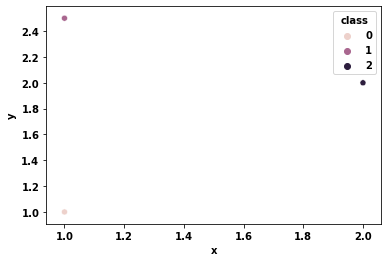

In [59]:
df = pd.DataFrame({'x': [1, 1, 2], 'y': [1, 2.5, 2], 'class': [0, 1, 2]})

sns.scatterplot(x = 'x', y = 'y', data = df, hue = 'class');

In [60]:
print('L1', '\n', 'first', 
    df['x'][1] - df['x'][0] + df['y'][1] - df['y'][0], '\n', 'second',
    df['x'][2] - df['x'][0] + df['y'][2] - df['y'][0]
)

print('L2', '\n', 'first',
    np.sqrt((df['x'][1] - df['x'][0])**2 + (df['y'][1] - df['y'][0])**2), '\n', 'second',
    np.sqrt((df['x'][2] - df['x'][0])**2 + (df['y'][2] - df['y'][0])**2)
)

L1 
 first 1.5 
 second 2.0
L2 
 first 1.5 
 second 1.4142135623730951
